In [2]:
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np

In [20]:
wheeled_path = "./wheeled_energy.pkl"
pure_path = "./pure_energy.pkl"
with open(wheeled_path, 'rb') as file:
    wheel = pkl.load(file)

with open(pure_path, "rb") as file:
    pure = pkl.load(file)
print(len(pure['cot']))

499


In [25]:
wheeled = wheel['cot']
wheleed_cummulative = []
wheeled_total = 0
pured = pure['cot']
pured_cumulative = []
pured_total = 0
for i in range(len(wheeled)):
    w_cot = np.abs(wheeled[i])
    wheeled_total += w_cot
    wheleed_cummulative.append(wheeled_total)
    p_cot = np.abs(pured[i])
    pured_total += p_cot
    pured_cumulative.append(pured_total)
time = list(range(len(wheeled)))

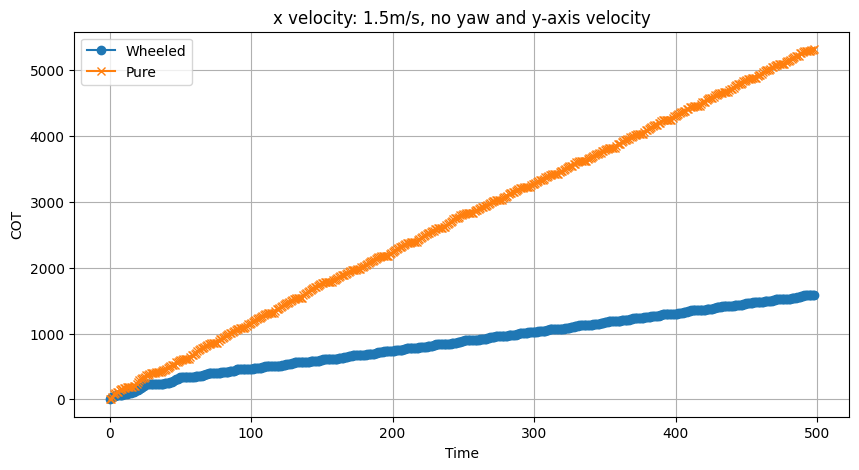

In [28]:
plt.figure(figsize=(10, 5))  # Adjust the size of the plot
plt.plot(time, wheleed_cummulative, label='Wheeled', marker='o')  # Plot 'wheeled' list
plt.plot(time, pured_cumulative, label='Pure', marker='x')  # Plot 'pure' list

# Adding title and labels
plt.title('x velocity: 1.5m/s, no yaw and y-axis velocity')
plt.xlabel('Time')
plt.ylabel('COT')
plt.legend()  # Add a legend to differentiate the two lines

# Display the plot
plt.grid(True)  # Add grid for better readability
plt.show()

In [8]:
comparison_path = "./Comparison.pkl"
with open(comparison_path, 'rb') as file:
    comparison = pkl.load(file)

comparison.keys()

dict_keys(['prediction', 'target'])

In [21]:
prediction = comparison['prediction']
target = comparison['target']
timesteps = list(range(len(prediction)))

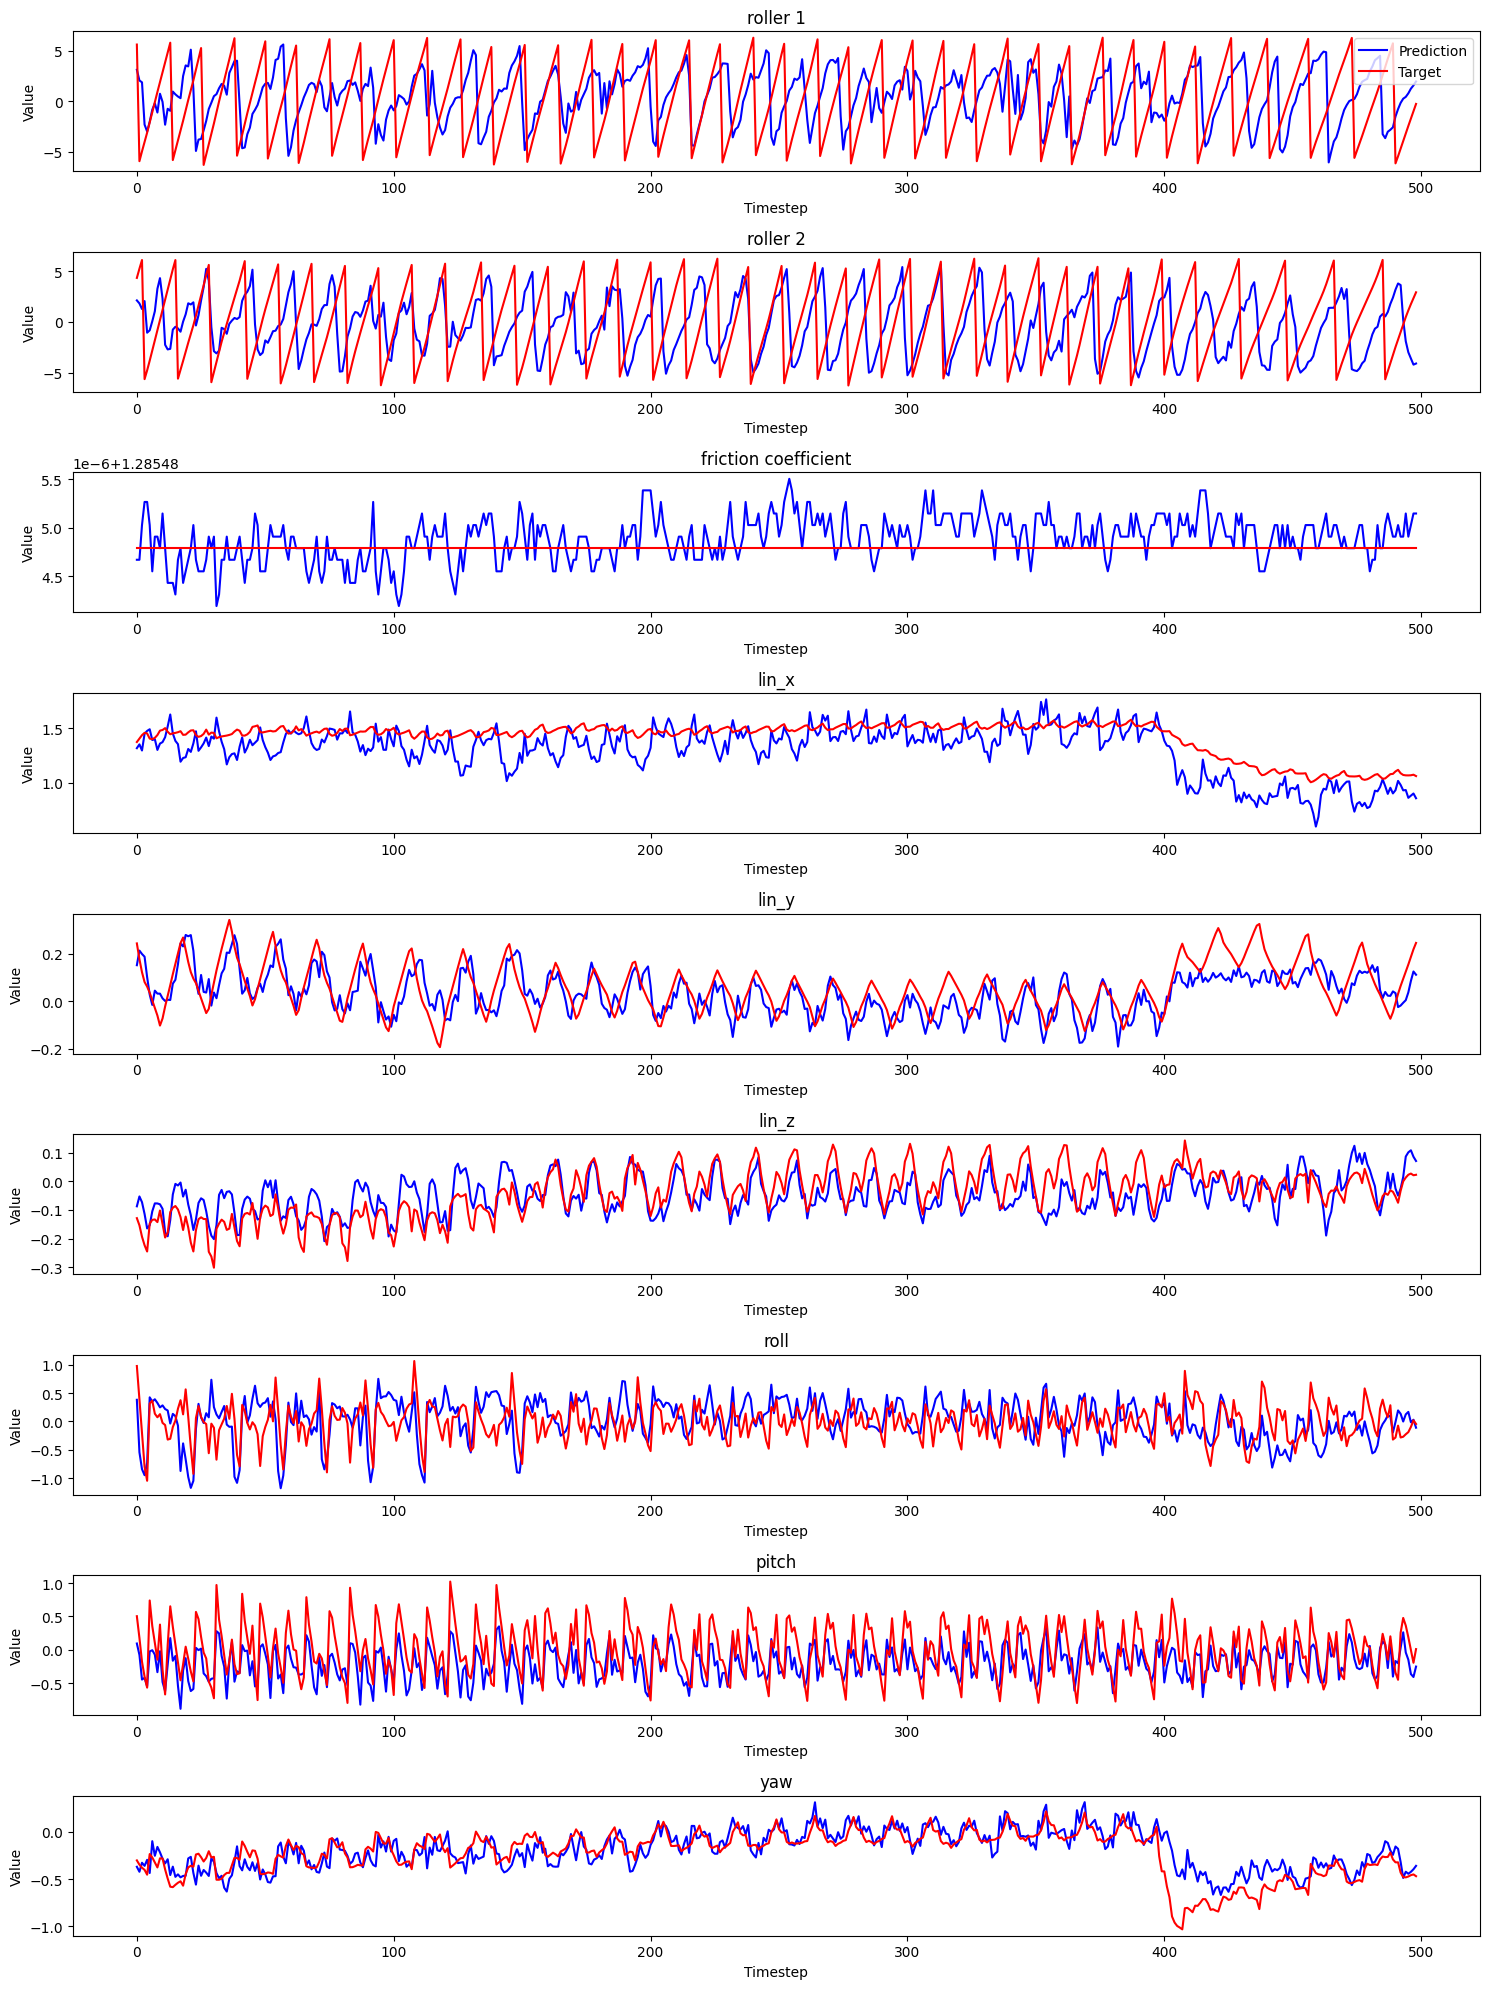

In [28]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(9, 1, figsize = (15, 20))

axes = axes.flatten()

# for i in range(9):
#     for index, (pred_tensor, target_tensor) in enumerate(zip(prediction, target)):
#         element1 = pred_tensor[0, i].cpu().detach().numpy()
#         element2 = target_tensor[0, i].cpu().detach().numpy()
#         axes[i].plot(timesteps[index], element1, color='blue', marker='o', label='Prediction' if pred_tensor is prediction[0] else "")
#         axes[i].plot(timesteps[index], element2, color='red', marker='x', label='Target' if target_tensor is target[0] else "")

#     axes[i].set_title(f'Element {i+1} Comparison')
#     if i == 0:
#         axes[i].legend()

titles = ["roller 1", "roller 2", "friction coefficient", "lin_x", "lin_y", "lin_z", "roll", "pitch", "yaw"]

for i in range(9):  # Since each tensor has 9 elements
    values_prediction = [tensor[0, i].item() for tensor in prediction]  # Extract all i-th elements from prediction
    values_target = [tensor[0, i].item() for tensor in target]  # Extract all i-th elements from target
    
    # Plot each element, element-wise across the tensors, against the timestep
    axes[i].plot(timesteps, values_prediction, color='blue', label='Prediction' if i == 0 else "")
    axes[i].plot(timesteps, values_target, color='red', label='Target' if i == 0 else "")

    axes[i].set_title(titles[i])
    axes[i].set_xlabel('Timestep')
    axes[i].set_ylabel('Value')

    if i == 0:
        axes[i].legend()


plt.tight_layout()
plt.show()
